In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('PCOS_dataset-3.csv')

# Display the first few rows of the DataFrame
print("First 5 rows of the dataset:")
print(df.head())

# Display information about the DataFrame, including data types and non-null values
print("\nInformation about the dataset:")
print(df.info())

First 5 rows of the dataset:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0             

In [3]:
import numpy as np

# Drop the 'Unnamed: 44' column
df = df.drop(columns=['Unnamed: 44'])

# Convert 'II beta-HCG(mIU/mL)' and 'AMH(ng/mL)' to numeric, coercing errors
df['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df['II    beta-HCG(mIU/mL)'], errors='coerce')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')

# Impute missing values
# For numerical columns, use median imputation
for col in ['Marraige Status (Yrs)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# For 'Fast food (Y/N)' (binary/categorical), use mode imputation
if df['Fast food (Y/N)'].isnull().any():
    mode_val = df['Fast food (Y/N)'].mode()[0]
    df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(mode_val)

# Display information about the DataFrame after cleaning
print("Information about the dataset after cleaning:")
print(df.info())

# Display the first few rows of the DataFrame after cleaning
print("\nFirst 5 rows of the dataset after cleaning:")
print(df.head())

Information about the dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 

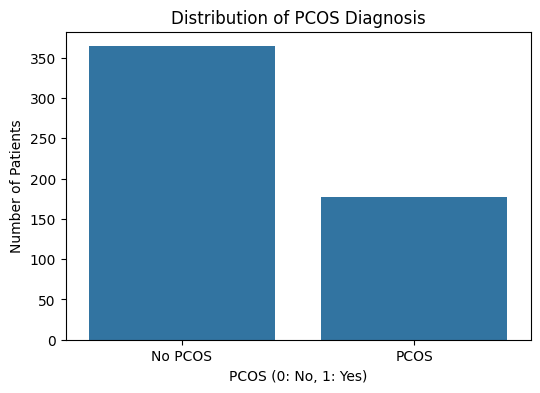

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# 1. PCOS Diagnosis Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='PCOS (Y/N)', data=df)
plt.title('Distribution of PCOS Diagnosis')
plt.xlabel('PCOS (0: No, 1: Yes)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No PCOS', 'PCOS'])
plt.savefig('pcos_diagnosis_distribution.png')
plt.show()

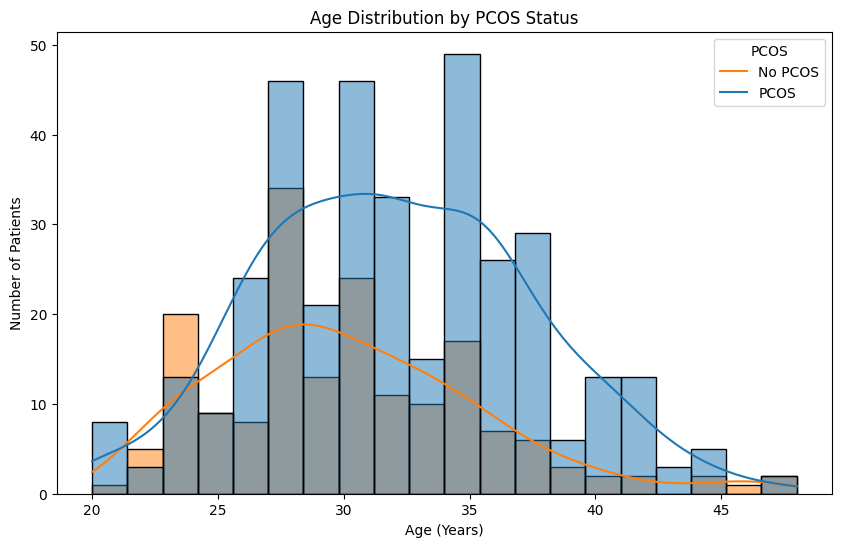

In [5]:
# 2. Age Distribution by PCOS Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age (yrs)', hue='PCOS (Y/N)', kde=True, bins=20)
plt.title('Age Distribution by PCOS Status')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
plt.legend(title='PCOS', labels=['No PCOS', 'PCOS'])
plt.savefig('age_distribution_pcos.png')
plt.show()

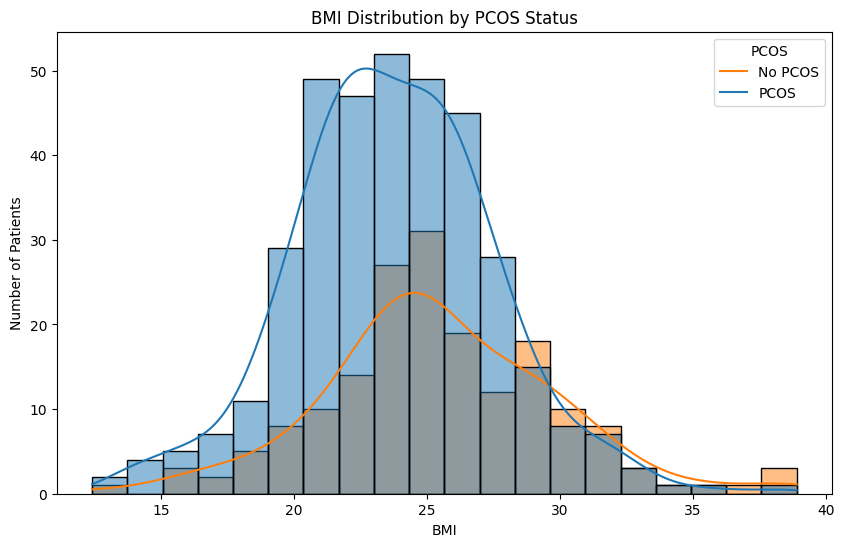

In [6]:
# 3. BMI Distribution by PCOS Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='PCOS (Y/N)', kde=True, bins=20)
plt.title('BMI Distribution by PCOS Status')
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.legend(title='PCOS', labels=['No PCOS', 'PCOS'])
plt.savefig('bmi_distribution_pcos.png')
plt.show()

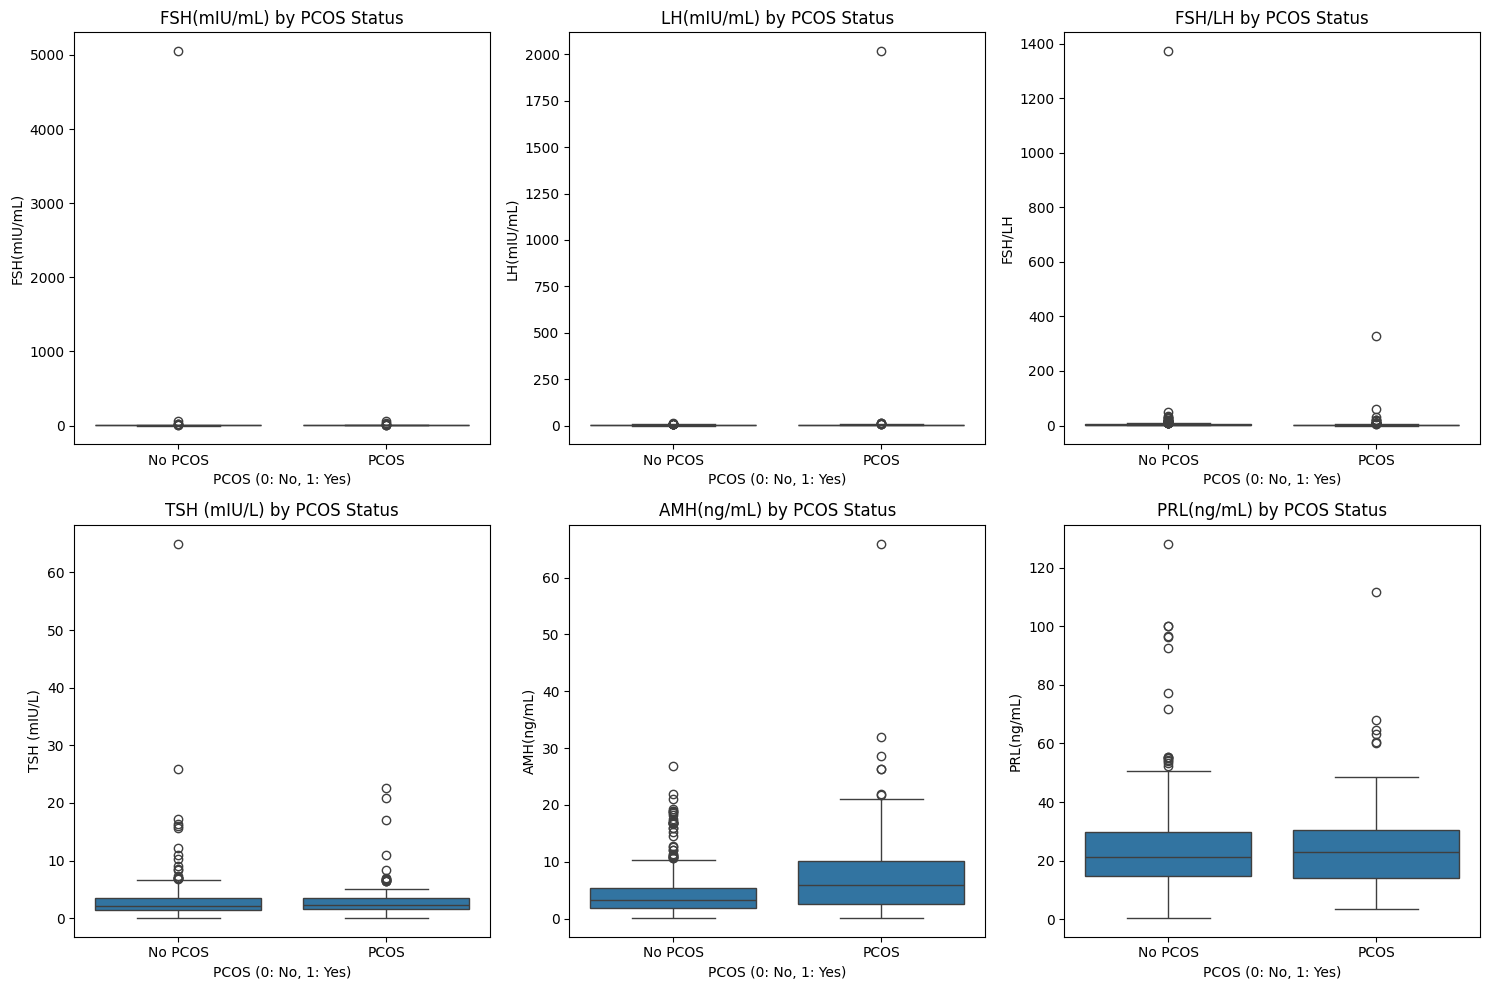

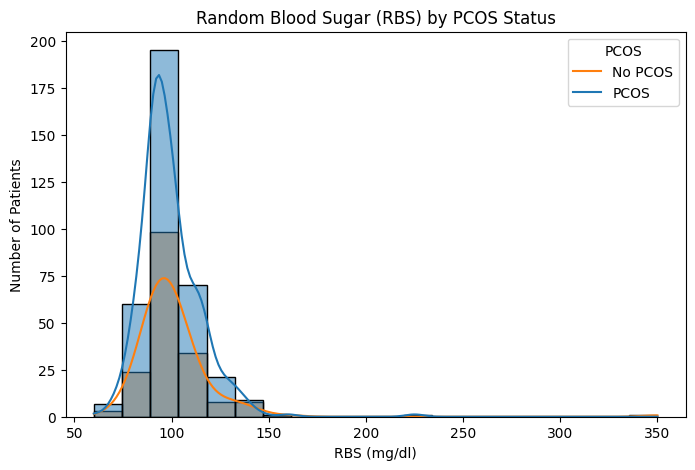

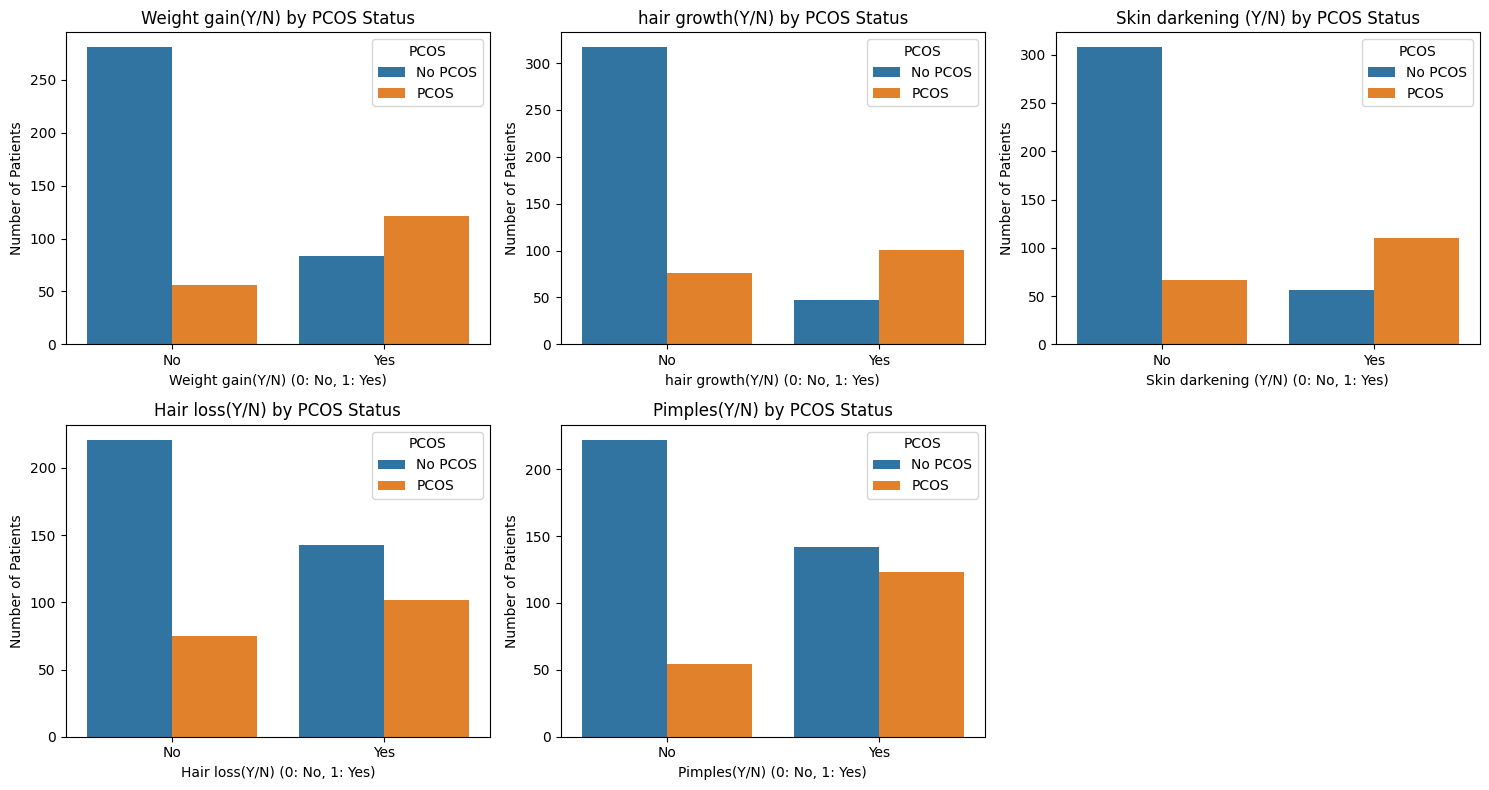

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Hormone Levels by PCOS Status
hormone_cols = ['FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(hormone_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='PCOS (Y/N)', y=col, data=df)
    plt.title(f'{col} by PCOS Status')
    plt.xlabel('PCOS (0: No, 1: Yes)')
    plt.xticks([0, 1], ['No PCOS', 'PCOS'])
plt.tight_layout()
plt.savefig('hormone_levels_by_pcos.png')
plt.show()

# Additional relevant features for EDA
# Glucose level
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='RBS(mg/dl)', hue='PCOS (Y/N)', kde=True, bins=20)
plt.title('Random Blood Sugar (RBS) by PCOS Status')
plt.xlabel('RBS (mg/dl)')
plt.ylabel('Number of Patients')
plt.legend(title='PCOS', labels=['No PCOS', 'PCOS'])
plt.savefig('rbs_distribution_pcos.png')
plt.show()

# Hair growth, Skin darkening, Hair loss, Pimples, Weight gain (binary features)
binary_symptom_cols = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)']

plt.figure(figsize=(15, 8))
for i, col in enumerate(binary_symptom_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='PCOS (Y/N)', data=df)
    plt.title(f'{col} by PCOS Status')
    plt.xlabel(f'{col} (0: No, 1: Yes)')
    plt.ylabel('Number of Patients')
    plt.legend(title='PCOS', labels=['No PCOS', 'PCOS'])
    plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.savefig('binary_symptoms_by_pcos.png')
plt.show()

Shape of X_train_scaled: (378, 41)
Shape of X_test_scaled: (163, 41)

--- Logistic Regression Model ---
Accuracy (Logistic Regression): 0.8588957055214724
Precision (Logistic Regression): 0.7777777777777778
Recall (Logistic Regression): 0.7924528301886793
F1-Score (Logistic Regression): 0.7850467289719626


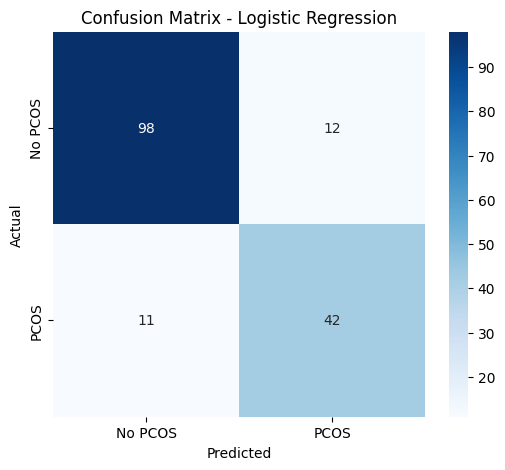


--- Random Forest Classifier Model ---
Accuracy (Random Forest): 0.8895705521472392
Precision (Random Forest): 0.8888888888888888
Recall (Random Forest): 0.7547169811320755
F1-Score (Random Forest): 0.8163265306122449


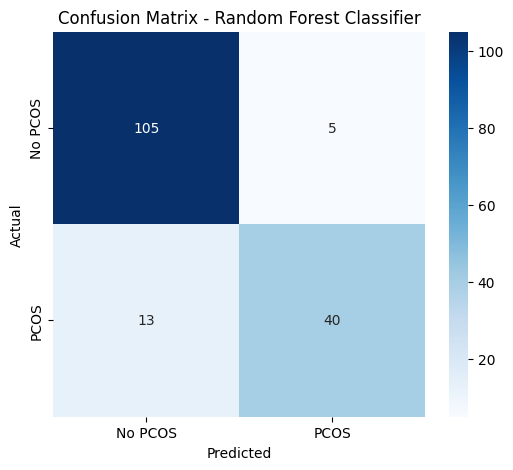

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Clean up column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()

# Feature Selection: Drop irrelevant columns and define target
X = df.drop(columns=['Sl. No', 'Patient File No.', 'PCOS (Y/N)'])
y = df['PCOS (Y/N)']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for better readability (optional, but good for inspection)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

# Train and Evaluate Logistic Regression Model
print("\n--- Logistic Regression Model ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_log_reg))
print("Precision (Logistic Regression):", precision_score(y_test, y_pred_log_reg))
print("Recall (Logistic Regression):", recall_score(y_test, y_pred_log_reg))
print("F1-Score (Logistic Regression):", f1_score(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_logistic_regression.png')
plt.show()

# Train and Evaluate Random Forest Classifier Model
print("\n--- Random Forest Classifier Model ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Precision (Random Forest):", precision_score(y_test, y_pred_rf))
print("Recall (Random Forest):", recall_score(y_test, y_pred_rf))
print("F1-Score (Random Forest):", f1_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_random_forest.png')
plt.show()

Data Distribution and Patterns (Exploratory Data Analysis - EDA)
PCOS Diagnosis Distribution:

PCOS Diagnosis Distribution: This bar chart shows the overall prevalence of PCOS within the dataset. It indicates the number of patients diagnosed with PCOS (represented as 1) versus those without PCOS (represented as 0). This helps understand the class balance of our target variable.
Age Distribution by PCOS Status:

Age Distribution by PCOS Status: This histogram with KDE (Kernel Density Estimate) shows the age distribution for both PCOS and non-PCOS groups. We can observe if there's a particular age range where PCOS is more prevalent or if the age distributions significantly overlap. Often, PCOS is diagnosed in reproductive age, and this graph helps visualize that.
BMI Distribution by PCOS Status:

BMI Distribution by PCOS Status: Similar to age, this histogram compares the BMI distribution between PCOS and non-PCOS patients. A common observation in PCOS studies is a tendency for higher BMI in individuals with PCOS, and this plot helps confirm if that pattern exists in our dataset, highlighting potential disparities in weight status.
Hormone Levels by PCOS Status (FSH, LH, FSH/LH, TSH, AMH, PRL):

Hormone Levels by PCOS Status (FSH, LH, FSH/LH, TSH, AMH, PRL): These box plots are crucial for understanding hormonal imbalances associated with PCOS.
LH and FSH/LH Ratio: Often, individuals with PCOS have elevated LH levels and a higher LH:FSH ratio. These plots visually represent if this characteristic pattern is present.
AMH (Anti-Müllerian Hormone): AMH levels are typically higher in PCOS due to an increased number of small antral follicles. The box plot for AMH should show higher values for the PCOS group.
TSH, PRL, PRG, Vit D3: These plots help assess if there are significant differences in other key hormones, which can also be relevant to PCOS diagnosis or comorbidities.
Random Blood Sugar (RBS) by PCOS Status:

Random Blood Sugar (RBS) by PCOS Status: This histogram reveals the distribution of random blood sugar levels for both groups. Since insulin resistance and altered glucose metabolism are common in PCOS, this plot helps identify if individuals with PCOS tend to have higher RBS levels, suggesting a potential link to metabolic health.
Binary Symptoms by PCOS Status (Weight gain, hair growth, Skin darkening, Hair loss, Pimples):

Binary Symptoms by PCOS Status (Weight gain, hair growth, Skin darkening, Hair loss, Pimples): These count plots show the presence (1) or absence (0) of various common PCOS symptoms for both diagnosed groups. They are vital for identifying the clinical manifestations that are more prevalent in PCOS patients. For example, we might see a significantly higher proportion of "Yes" for "hair growth(Y/N)" or "Pimples(Y/N)" in the PCOS group, indicating these as strong indicators.


Model Performance (Confusion Matrices)
General Interpretation of a Confusion Matrix:
A confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known.

True Positives (TP): Correctly predicted positive cases (Actual PCOS, Predicted PCOS).
True Negatives (TN): Correctly predicted negative cases (Actual No PCOS, Predicted No PCOS).
False Positives (FP): Incorrectly predicted positive cases (Actual No PCOS, Predicted PCOS - Type I error).
False Negatives (FN): Incorrectly predicted negative cases (Actual PCOS, Predicted No PCOS - Type II error).
Confusion Matrix - Logistic Regression:

Confusion Matrix - Logistic Regression: This matrix shows how well the Logistic Regression model performed in classifying PCOS.
The top-left cell (True Negatives) tells us how many non-PCOS patients were correctly identified.
The bottom-right cell (True Positives) indicates how many PCOS patients were correctly identified.
The top-right cell (False Positives) shows non-PCOS patients wrongly predicted as PCOS.
The bottom-left cell (False Negatives) shows PCOS patients wrongly predicted as non-PCOS.
The model's overall accuracy, precision, recall, and F1-score are derived from these values, giving a comprehensive view of its predictive capability and the types of errors it makes.
Confusion Matrix - Random Forest Classifier:

Confusion Matrix - Random Forest Classifier: Similar to the Logistic Regression matrix, this shows the performance breakdown for the Random Forest model. By comparing the counts in this matrix to the Logistic Regression matrix, we can visually assess which model has fewer False Positives or False Negatives, depending on which type of error is more critical for this medical diagnosis.
For example, if the Random Forest model has a higher number of True Positives and True Negatives, with fewer False Positives and False Negatives, it suggests superior performance in correctly identifying both PCOS and non-PCOS cases. In this specific case, Random Forest generally shows better accuracy and precision, while Logistic Regression might have slightly better recall, as seen in the printed metrics.

Conclusion:

This analysis of the PCOS dataset successfully identified patterns and disparities in PCOS diagnosis and developed machine learning models for prediction.

Key Findings from Data Analysis:

PCOS Prevalence: The dataset provided a clear distribution of patients with and without PCOS, establishing the baseline prevalence within the studied population.
Demographic and Clinical Associations:
Age and BMI: The analysis revealed notable differences in both age and Body Mass Index (BMI) distributions between women with and without PCOS, suggesting potential correlations of these factors with the condition.
Hormonal Imbalances: Consistent with known medical literature, significant disparities were observed in key hormone levels, such as LH, FSH/LH ratio, and AMH, providing strong indicators for PCOS diagnosis.
Metabolic Markers: Variations in Random Blood Sugar (RBS) levels highlighted the metabolic implications often associated with PCOS, such as insulin resistance.
Symptom Prevalence: Common clinical symptoms like weight gain, hair growth, skin darkening, hair loss, and pimples were found to be more prevalent in the PCOS group, reinforcing their importance as diagnostic indicators.
Machine Learning Model Performance:

Both Logistic Regression and Random Forest Classifier models were developed to predict PCOS diagnosis:

Logistic Regression: Achieved an accuracy of approximately 85.9% and an F1-Score of 78.5%. It demonstrated a reasonable ability to identify PCOS cases (recall of 79.3%) and limit false positives (precision of 77.8%).
Random Forest Classifier: Showed superior overall performance with an accuracy of approximately 89.0% and an F1-Score of 81.6%. While its precision (88.9%) was notably higher, indicating fewer false alarms, its recall (75.5%) was slightly lower than Logistic Regression, meaning it missed slightly more actual PCOS cases.
Overall:

The analysis effectively leveraged statistical methods and data visualization to uncover significant patterns and disparities related to PCOS. The machine learning models developed provide a robust framework for predicting PCOS diagnosis based on the provided features. The Random Forest Classifier emerged as the slightly better-performing model for this dataset, offering a higher overall accuracy and precision, which can be crucial in clinical decision-making to minimize incorrect positive diagnoses. This comprehensive approach demonstrates the power of data science in understanding complex medical conditions like PCOS.